# Explore here

In [6]:
!pip install python-dotenv

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [7]:
from dotenv import load_dotenv
load_dotenv()

import os

client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

In [8]:
import base64
import requests

# Encode the client credentials
client_credentials = f"{client_id}:{client_secret}"
client_credentials_base64 = base64.b64encode(client_credentials.encode())

# Prepare the token request
token_url = "https://accounts.spotify.com/api/token"
headers = {
    "Authorization": f"Basic {client_credentials_base64.decode()}"
}
data = {
    "grant_type": "client_credentials"
}

# Request access token
response = requests.post(token_url, headers=headers, data=data)

# Check if the request was successful
if response.status_code == 200:
    access_token = response.json()['access_token']
    print("Access token obtained!")
else:
    print(f"Failed to obtain access token. Status code: {response.status_code}")
    print(response.text)

Access token obtained!


In [9]:
# Set the access token in the headers
headers = {
    "Authorization": f"Bearer {access_token}"
}

# Define the endpoint and parameters
search_url = "https://api.spotify.com/v1/search"
params = {
    "q": "Drake",  # Artist name to search for
    "type": "artist",
    "limit": 1
}

# Make the API request to search for the artist
response = requests.get(search_url, headers=headers, params=params)

# Check if the request was successful
if response.status_code == 200:
    response_data = response.json()
    # print(f"Response Data: {response_data}")
    artist_id = response_data['artists']['items'][0]['id']
    artist_name = response_data['artists']['items'][0]['name']
    print(f"Found artist: {artist_name} (ID: {artist_id})")
else:
    print(f"Failed to search for artist. Status code: {response.status_code}")
    print(response.text)

Found artist: Drake (ID: 3TVXtAsR1Inumwj472S9r4)


In [10]:
# Define the endpoint for the artist's top tracks
top_tracks_url = f"https://api.spotify.com/v1/artists/{artist_id}/top-tracks"
params = {
    "market": "US"  # Specify the market (country)
}

# Make the API request to get top tracks
response = requests.get(top_tracks_url, headers=headers, params=params)

# Check if the request was successful
if response.status_code == 200:
    top_tracks_data = response.json()
    print(f"Top tracks for {artist_name}:")
    for idx, track in enumerate(top_tracks_data['tracks'], start=1):
        # print(f"Track data: {track}")
        track_name = track['name']
        album_name = track['album']['name']
        popularity = track['popularity']
        duration = track['duration_ms']
        print(f"{idx}. {track_name} - Album: {album_name}")
else:
    print(f"Failed to get top tracks. Status code: {response.status_code}")
    print(response.text)

Top tracks for Drake:
1. One Dance - Album: Views
2. WAIT FOR U (feat. Drake & Tems) - Album: I NEVER LIKED YOU
3. God's Plan - Album: Scorpion
4. Jimmy Cooks (feat. 21 Savage) - Album: Honestly, Nevermind
5. Passionfruit - Album: More Life
6. Circadian Rhythm - Album: 100 GIGS
7. Rich Baby Daddy (feat. Sexyy Red & SZA) - Album: For All The Dogs
8. No Face - Album: No Face
9. It's Up (feat. Young Thug & 21 Savage) - Album: 100 GIGS
10. Fair Trade (with Travis Scott) - Album: Certified Lover Boy


In [14]:
import pandas as pd
response = requests.get(top_tracks_url, headers=headers, params=params)
top_tracks_data = response.json()
tracks_info = []
for track in top_tracks_data['tracks']:
    track_info = {
        "name": track['name'], 
        "album_name": track['album']['name'],
        "popularity": track['popularity'],
        "duration_min": track['duration_ms'] / 60000
    }
    tracks_info.append(track_info)
df = pd.DataFrame(tracks_info)
df



,name,album_name,popularity,duration_min
0,One Dance,Views,85,2.899767
1,WAIT FOR U (feat. Drake & Tems),I NEVER LIKED YOU,82,3.164883
2,God's Plan,Scorpion,81,3.316217
3,Jimmy Cooks (feat. 21 Savage),"Honestly, Nevermind",80,3.639400
4,Passionfruit,More Life,80,4.982333
5,Circadian Rhythm,100 GIGS,80,2.105933
6,Rich Baby Daddy (feat. Sexyy Red & SZA),For All The Dogs,79,5.319850
7,No Face,No Face,79,2.285700
8,It's Up (feat. Young Thug & 21 Savage),100 GIGS,78,4.633333
9,Fair Trade (with Travis Scott),Certified Lover Boy,78,4.852917


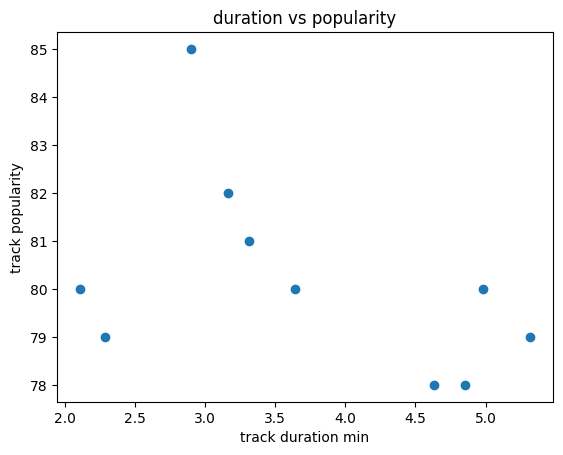

In [16]:
import matplotlib.pyplot as plt
plt.scatter(df['duration_min'], df['popularity'])

# Add labels and title
plt.xlabel('track duration min')
plt.ylabel('track popularity')
plt.title('duration vs popularity')

# Show the plot
plt.show()

In [13]:
def get_access_token(client_id, client_secret):
    try:
        # Encoding and token request as before
        client_credentials = f"{client_id}:{client_secret}"
        client_credentials_base64 = base64.b64encode(client_credentials.encode())
        token_url = "https://accounts.spotify.com/api/token"
        headers = {
            "Authorization": f"Basic {client_credentials_base64.decode()}"
        }
        data = {
            "grant_type": "client_credentials"
        }
        response = requests.post(token_url, headers=headers, data=data)
        response.raise_for_status()  # Raises an HTTPError for bad status codes
        access_token = response.json()['access_token']
        return access_token
    except requests.exceptions.HTTPError as err:
        print(f"HTTP error occurred: {err}")
    except Exception as err:
        print(f"An error occurred: {err}")
    return None

# Use the function to get the access token
access_token = get_access_token(client_id, client_secret)
if access_token:
    print("Access token obtained successfully.")
else:
    print("Failed to obtain access token.")

Access token obtained successfully.
